# DESCRIPTION OF DATASET
**This dataset consists of about 40000 articles consisting of fake as well as real news. Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake.The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each.**

# LOADING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### nltk
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import dataclasses
from nltk import word_tokenize
from nltk.corpus import stopwords 
import string 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import movie_reviews
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from random import shuffle
from wordcloud import WordCloud

## sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer


## gensim 
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.corpora import Dictionary
import gensim.downloader as api
from gensim.models import Word2Vec as w2v
from keras.utils import pad_sequences
from gensim.models import KeyedVectors

## tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, Activation
from tensorflow.keras.preprocessing.text import Tokenizer


from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# IMPORTING THE DATASET

In [2]:
true = pd.read_csv(r"C:\Fall 2022 courses\Project\NLP-Fake_News_Detect\Data\True-news.csv")
false = pd.read_csv(r"C:\Fall 2022 courses\Project\NLP-Fake_News_Detect\Data\Fake-news.csv")

## EDA

In [3]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
false.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
true['category'] = 1
false['category'] = 0

In [6]:
df = pd.concat([true,false]) #Merging the 2 datasets

In [7]:
df.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  category  
0  December 31, 2017          1  
1  December 29, 2017          1  
2  December 31, 2017          1  
3  December 30, 2017          1  
4  December 29, 2017          1

c:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

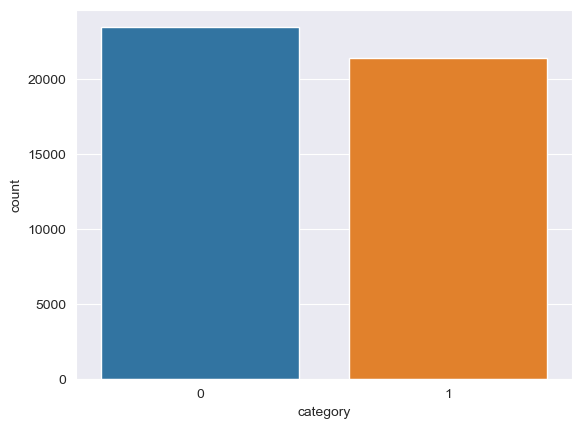

In [8]:
sns.set_style("darkgrid")
sns.countplot(df.category)

**SO, WE CAN SEE THAT THE DATASET IS BALANCED**

In [9]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  category  
0  December 31, 2017          1  
1  December 29, 2017          1  
2  December 31, 2017          1  
3  December 30, 2017          1  
4  December 29, 2017          1

In [10]:
df.isna().sum() # Checking for nan Values

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [11]:
df.title.count()

44898

In [12]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

**MERGING ALL THE TEXT DATA INTO 1 COLUMN i.e. 'text'**

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

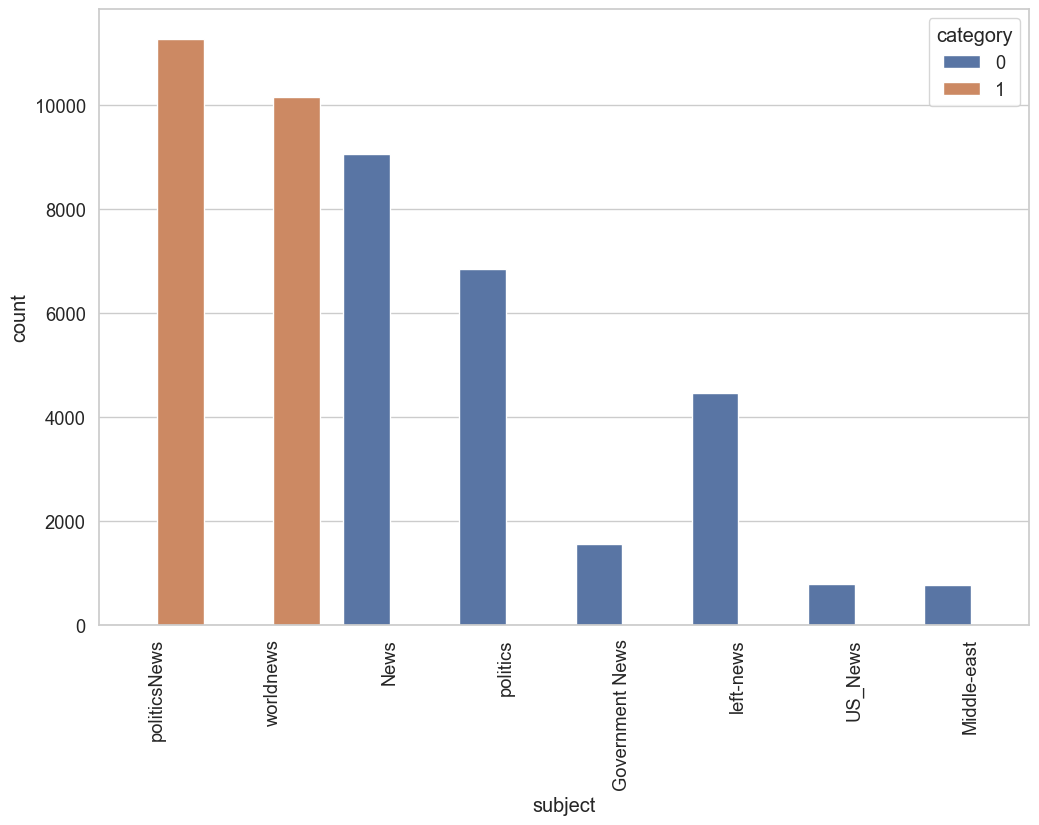

In [13]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

**SINCE THE TOPICS IN SUBJECT COLUMN ARE DIFFERENT FOR BOTH CATEGORIES, HENCE WE HAVE TO EXCLUDE IT FROM FINAL TEXT COLUMN**

In [14]:
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

**STOPWORDS:-**

**Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment.**

In [15]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

**DATA CLEANING**

In [16]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['text']=df['text'].apply(denoise_text)

c:\Users\prath\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


**WORDCLOUD FOR REAL TEXT (LABEL - 1)**

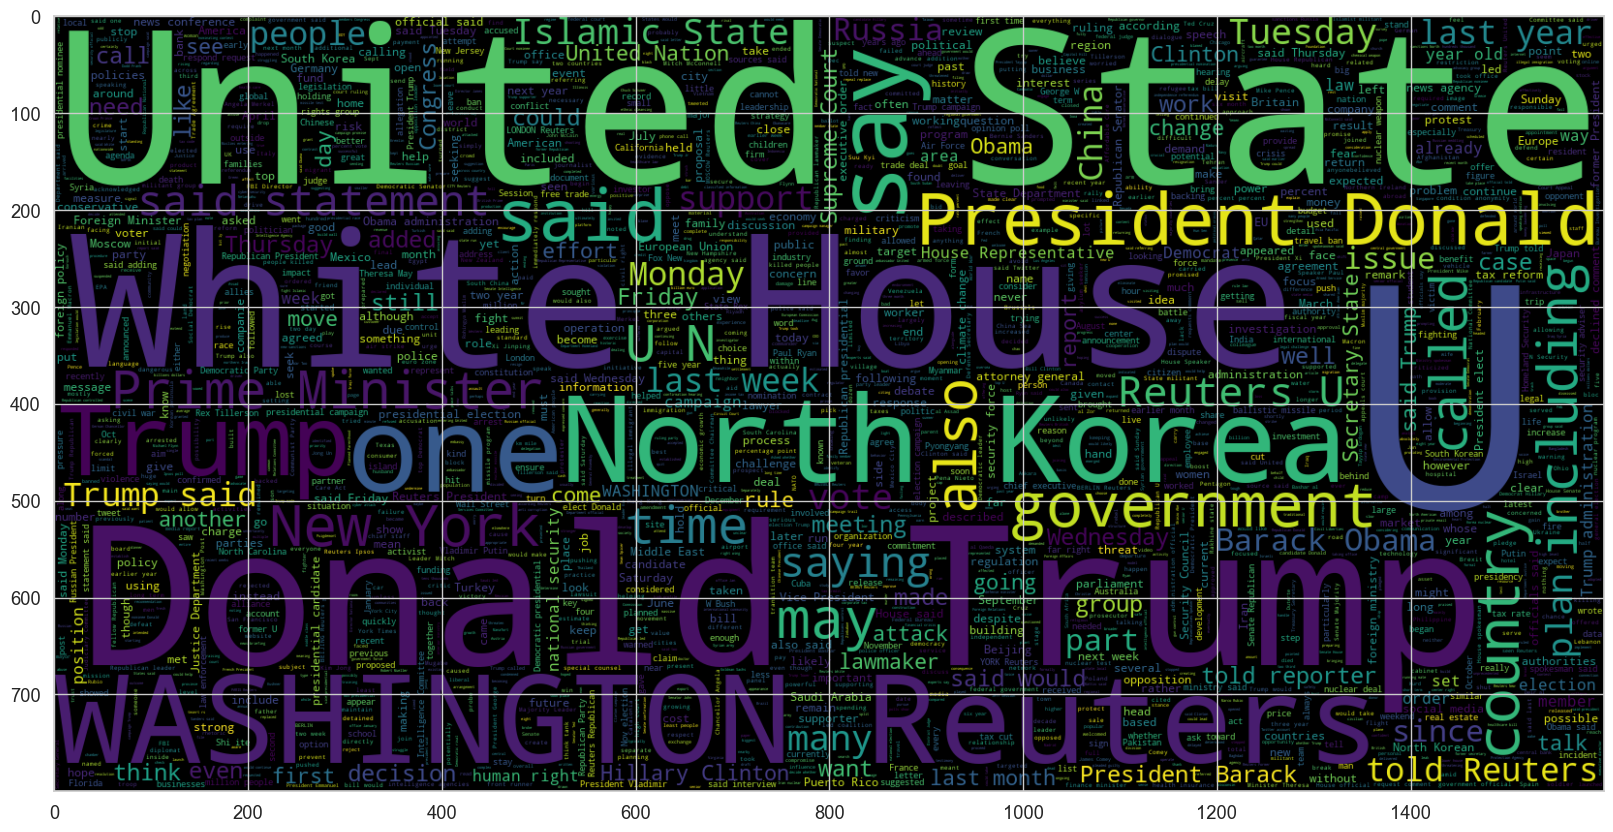

In [17]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words("english")).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

**WORDCLOUD FOR FAKE TEXT (LABEL - 0)**

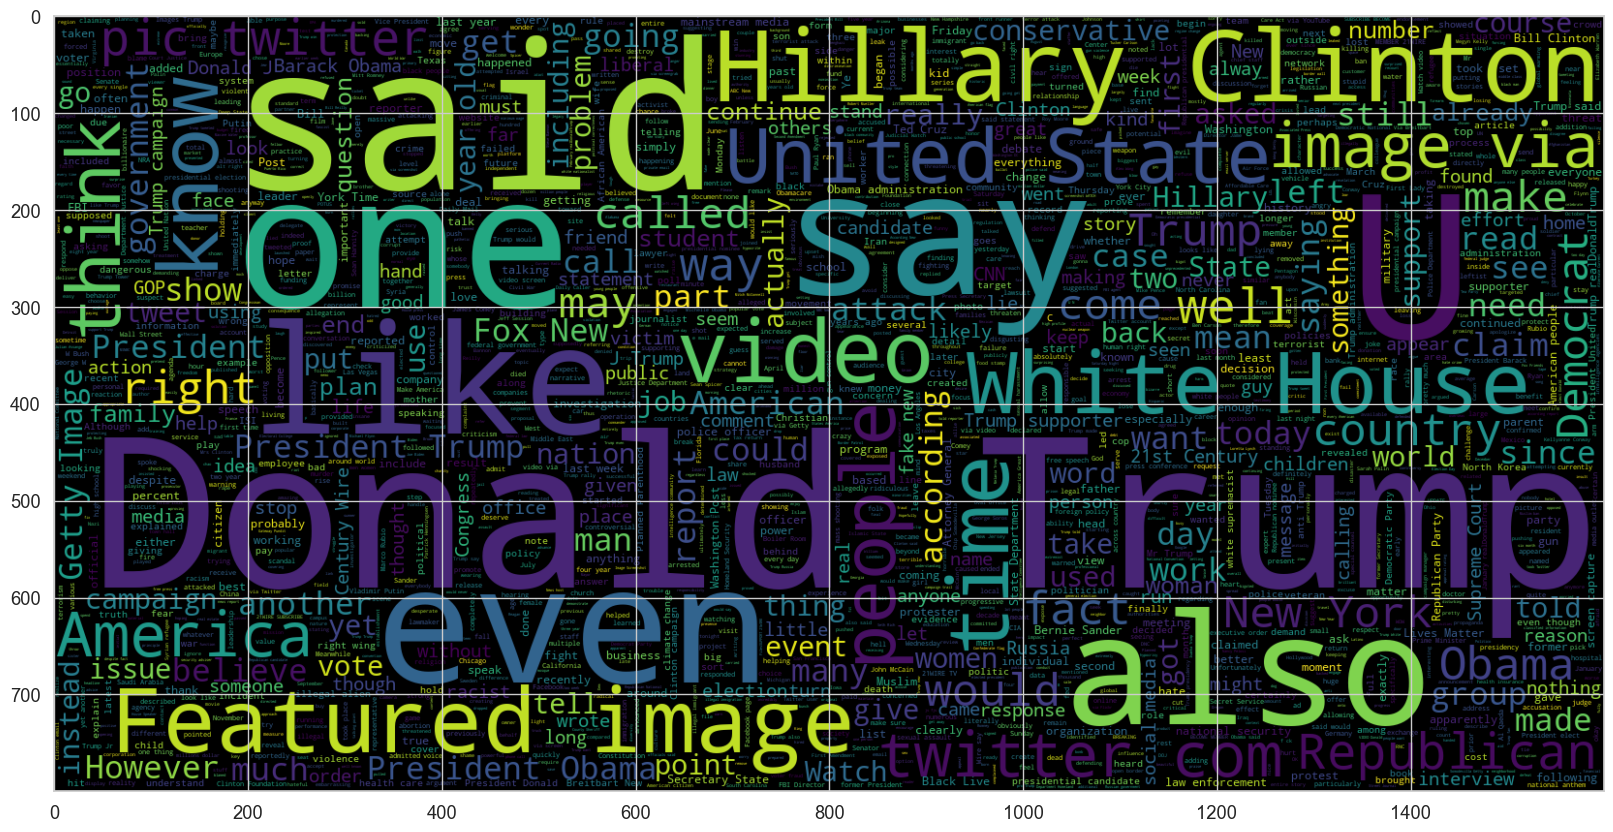

In [18]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words("english")).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

**Number of characters in texts**

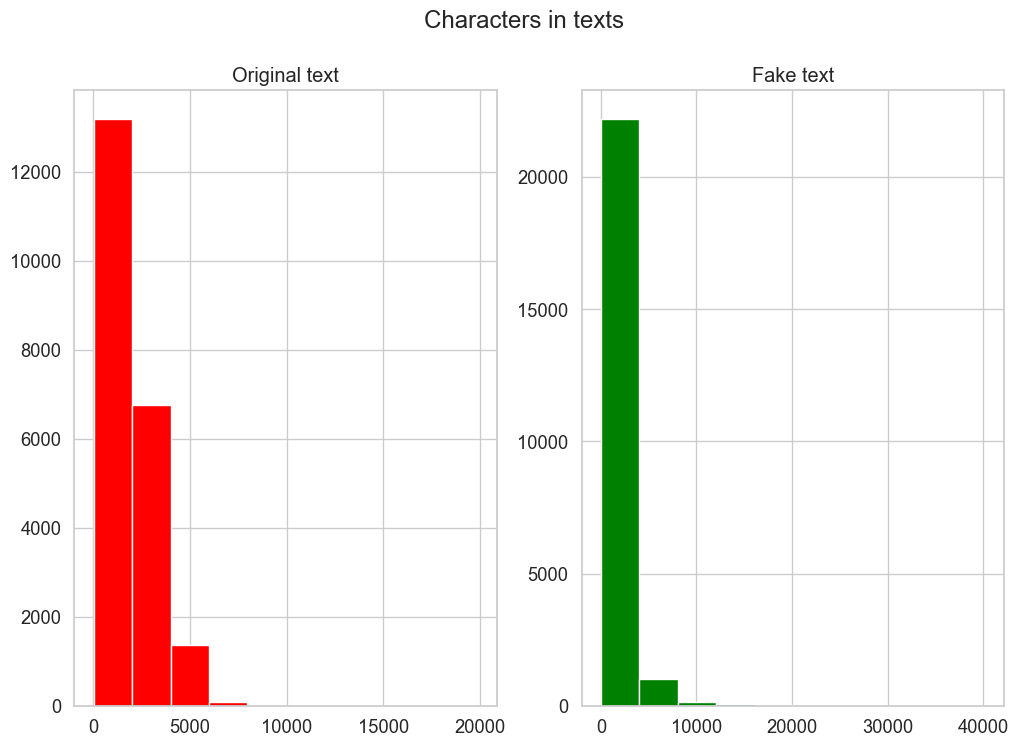

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

**The distribution of both seems to be a bit different. 2500 characters in text is the most common in original text category while around 5000 characters in text are most common in fake text category.**

**Number of words in each text**

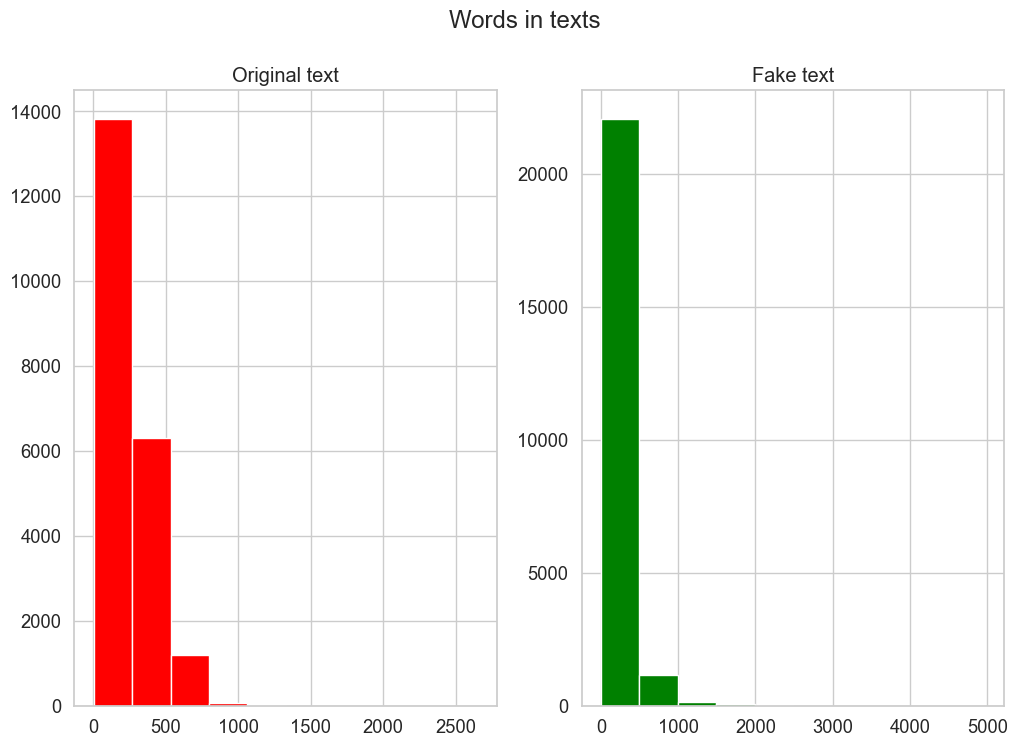

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

**Average word length in a text**

c:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\prath\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\prath\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

Text(0.5, 0.98, 'Average word length in each text')

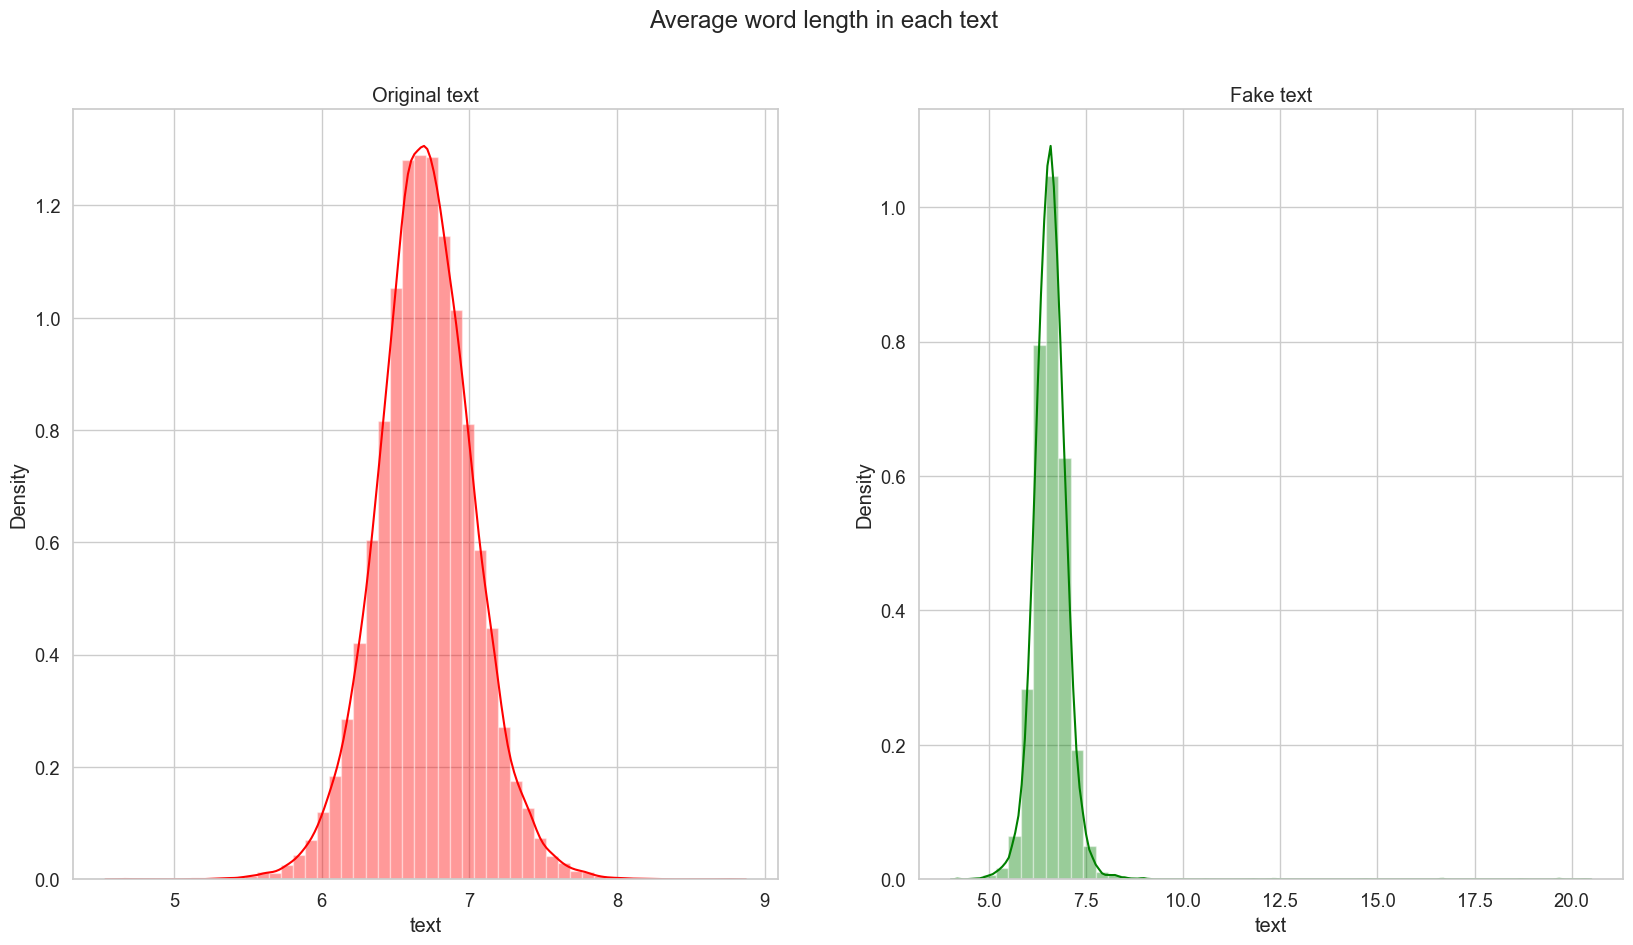

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [22]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:5]

['WASHINGTON', '(Reuters)', 'head', 'conservative', 'Republican']

In [23]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 111503,
 'said': 93162,
 'would': 54613,
 'U.S.': 50441,
 'President': 33180,
 'people': 33115,
 'also': 30325,
 'one': 29370,
 'Donald': 27795,
 'said.': 26194}

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

**Unigram Analysis**

<AxesSubplot:>

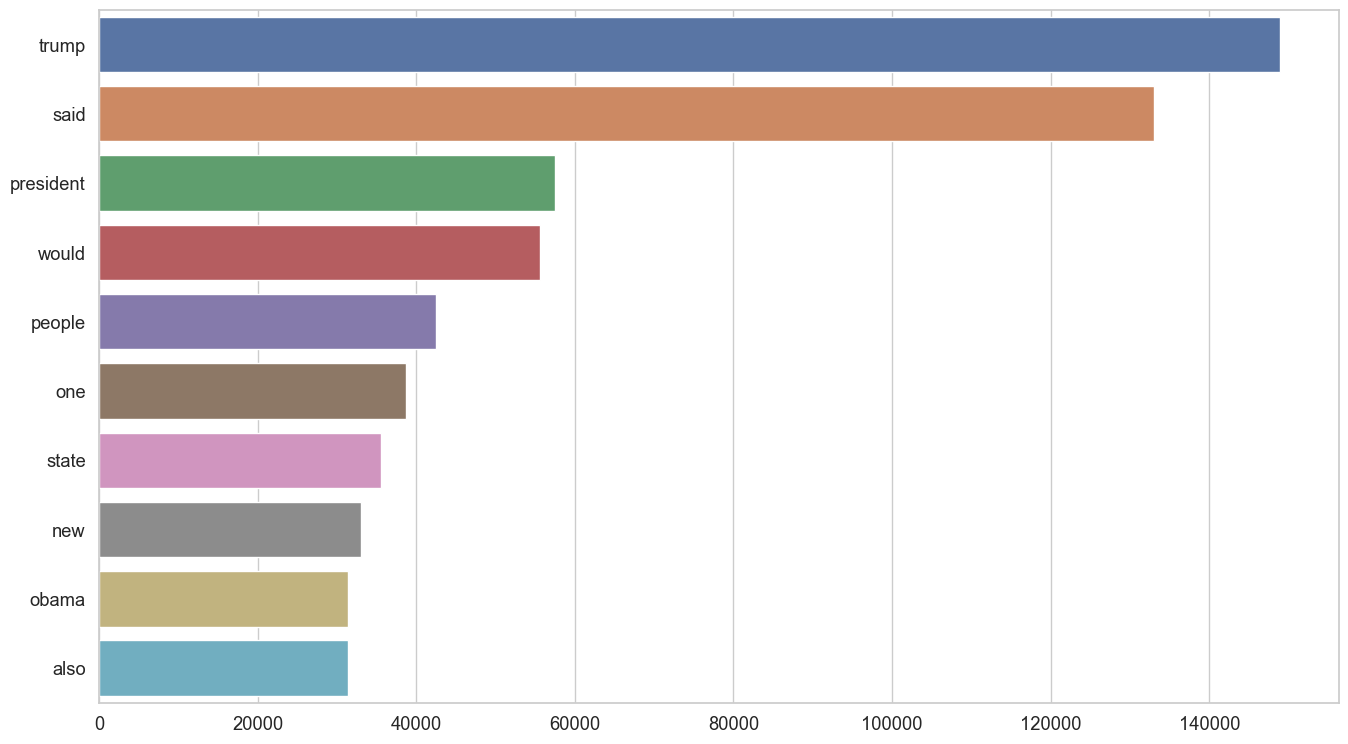

In [25]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

**Bigram Analysis**

<AxesSubplot:>

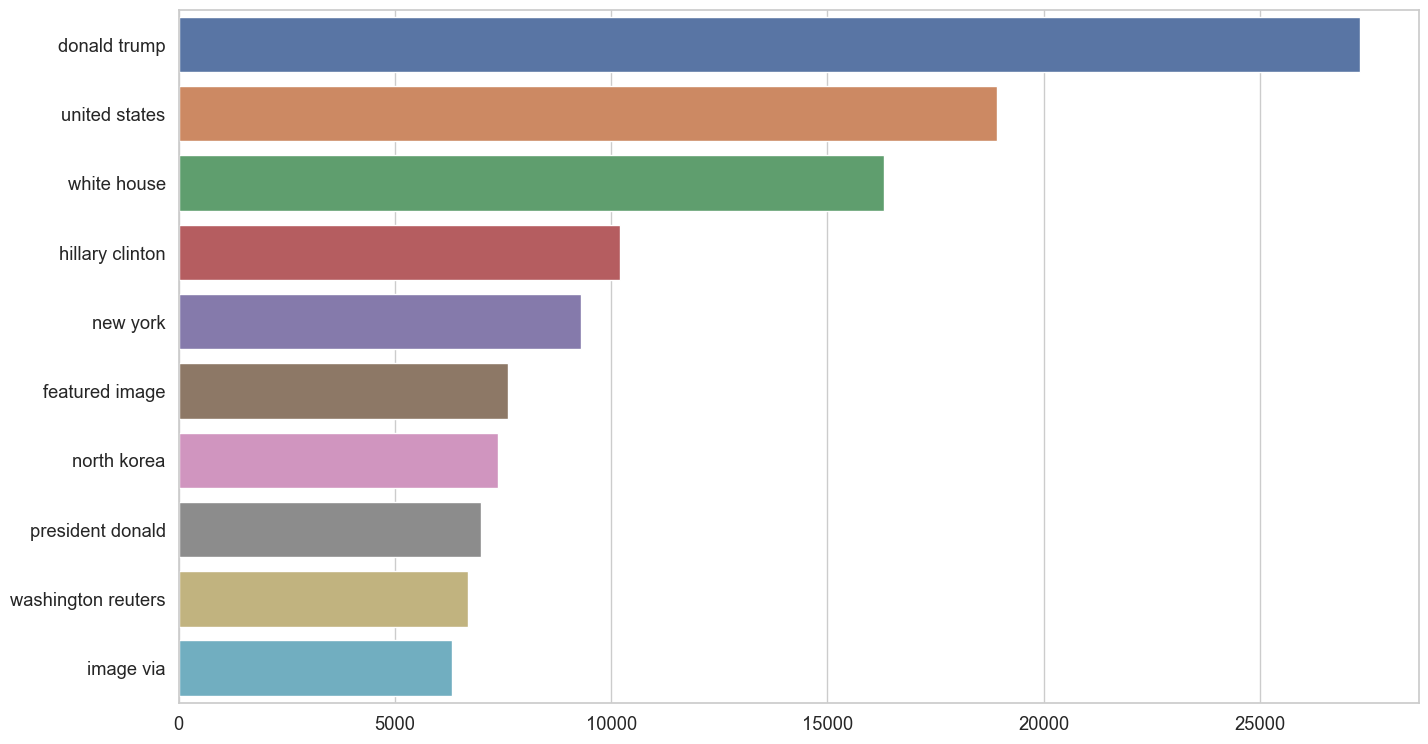

In [26]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

**Trigram Analysis**

<AxesSubplot:>

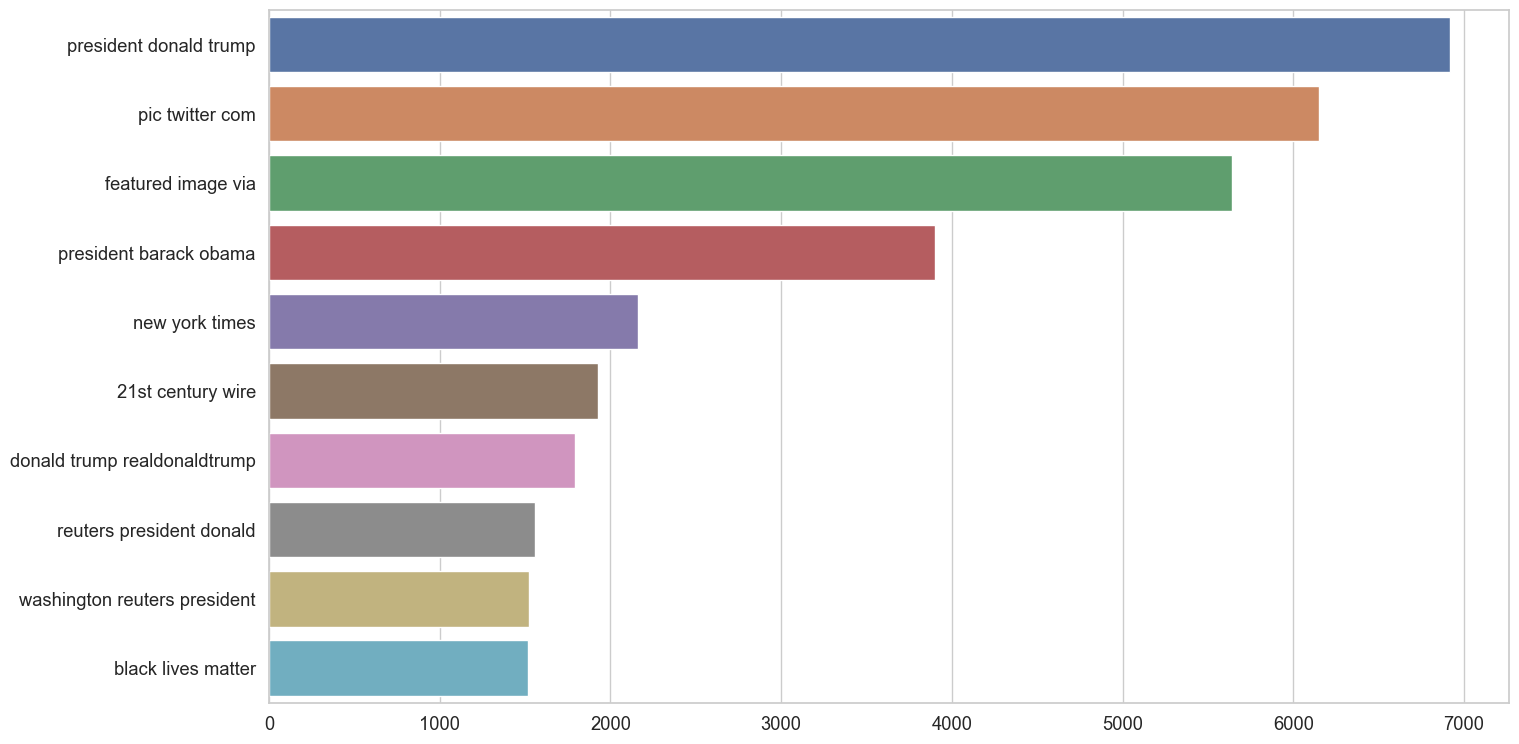

In [27]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

## Preprocessing

In [28]:
class TextProcessor :

  def strip_html(self, text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

  #Removing the square brackets
  def remove_between_square_brackets(self, text):
      return re.sub('\[[^]]*\]', '', text)
  # Removing URL's
  def remove_between_square_brackets(self, text):
      return re.sub(r'http\S+', '', text)
  
  #Removing the stopwords from text
  def remove_stopwords(self, text):
      final_text = []
      for i in text.split():
          if i.strip().lower() not in stop:
              final_text.append(i.strip())
      return " ".join(final_text)
  
  #Removing the noisy text
  def denoise_text(self, text):
      text = self.strip_html(text)
      text = self.remove_between_square_brackets(text)
      text = self.remove_stopwords(text)
      return text

  #### Lower Casing
  def lowerCasing(self, total_dataset):
    return total_dataset.text.apply(lambda x: " ".join(x.lower() for x in x.split()))

  #### Punctuation Removal
  def removePunctuation(self, text):
    for punctuation in string.punctuation:
        text = text.str.replace(punctuation, '').replace('"','').replace("'",'')
    return text
  
  #### Identifying and Removing Stop Words
  def removeStopWords(self, data):
    return data.apply(self.denoise_text)


  #### Tokenize Text in Words
  def tokenizeTextWords(self, data):
    return data.apply(lambda x: word_tokenize(x))

  #### NLTK word Stemming
  def wordStemming(self, tockenized_data):
    stemmer = PorterStemmer()
    return tockenized_data.apply(lambda x: [stemmer.stem(word) for word in x])
    ## stemmer expects tokenized data as input
   
  #### Lemmatizing words using WordNet
  def wordNetLemmatizer(self, tockenized_data):
    lemmatizer = WordNetLemmatizer()
 
    ## Lemmatizer expects tokenized data as input
    ## Lemmmatizer expects the part of speech with each word
    ## Use part of speech tagging with word
    ## thus it will reduce down the words properly
    return tockenized_data.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
  
  def remove_char(self, token_list):
     for i in token_list:
        if i=='"':
           token_list.remove(i)
        elif i=="'":
           token_list.remove(i)
  
  def remove_special_char(self,tockenized_data):
     return tockenized_data.apply(lambda x: self.remove_char(x))
  
    #### Plotting Frequencies of Words
  #### Plotting Frequencies of Words
  def plotWordFrequency(self, lemmatized_data):

    ## extract all words in list
  
    word_review_list = lemmatized_data.tolist()
    all_words = [item for sublist in word_review_list for item in sublist]
    ## initialize the frequency counter
    word_counter = Counter(all_words)

    most_common_words = word_counter.most_common()[:10]
    most_common_words = pd.DataFrame(most_common_words)
    most_common_words.columns = ['word', 'freq']
    plt.figure(figsize=(14,7))
    most_common_words.sort_values(by='freq',ascending=True).plot(x='word', kind='barh')
    plt.show()

In [29]:
## creating object of text processor class to call its methods
textProcessorObject = TextProcessor()

In [30]:
## converting to lower case
df['lowercase_text'] = textProcessorObject.lowerCasing(df)
df.head()

text  category  \
0  WASHINGTON (Reuters) head conservative Republi...         1   
1  WASHINGTON (Reuters) Transgender people allowe...         1   
2  WASHINGTON (Reuters) special counsel investiga...         1   
3  WASHINGTON (Reuters) Trump campaign adviser Ge...         1   
4  SEATTLE/WASHINGTON (Reuters) President Donald ...         1   

                                      lowercase_text  
0  washington (reuters) head conservative republi...  
1  washington (reuters) transgender people allowe...  
2  washington (reuters) special counsel investiga...  
3  washington (reuters) trump campaign adviser ge...  
4  seattle/washington (reuters) president donald ...

In [36]:
## removing punctuations
df['remove_punctuation'] = textProcessorObject.removePunctuation(df['lowercase_text'] ).str.replace('[^\w\s]','')
df.head()

C:\Users\prath\AppData\Local\Temp\ipykernel_60584\3250627370.py:36: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  text = text.str.replace(punctuation, '').replace('"','').replace("'",'')
C:\Users\prath\AppData\Local\Temp\ipykernel_60584\2625195419.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['remove_punctuation'] = textProcessorObject.removePunctuation(df['lowercase_text'] ).str.replace('[^\w\s]','')


text  category  \
0  WASHINGTON (Reuters) head conservative Republi...         1   
1  WASHINGTON (Reuters) Transgender people allowe...         1   
2  WASHINGTON (Reuters) special counsel investiga...         1   
3  WASHINGTON (Reuters) Trump campaign adviser Ge...         1   
4  SEATTLE/WASHINGTON (Reuters) President Donald ...         1   

                                      lowercase_text  \
0  washington (reuters) head conservative republi...   
1  washington (reuters) transgender people allowe...   
2  washington (reuters) special counsel investiga...   
3  washington (reuters) trump campaign adviser ge...   
4  seattle/washington (reuters) president donald ...   

                                  remove_punctuation  \
0  washington reuters head conservative republica...   
1  washington reuters transgender people allowed ...   
2  washington reuters special counsel investigati...   
3  washington reuters trump campaign adviser geor...   
4  seattlewashington reuters president donald tru...   

                                   stopwords_removal  tokens  
0  washington reuters head conservative republica...     NaN  
1  washington reuters transgender people allowed ...     NaN  
2  washington reuters special counsel investigati...     NaN  
3  washington reuters trump campaign adviser geor...     NaN  
4  seattlewashington reuters president donald tru...     NaN

In [37]:
## Removing stop words
df['stopwords_removal'] = textProcessorObject.removeStopWords(df['remove_punctuation'] )
df.head()

text  category  \
0  WASHINGTON (Reuters) head conservative Republi...         1   
1  WASHINGTON (Reuters) Transgender people allowe...         1   
2  WASHINGTON (Reuters) special counsel investiga...         1   
3  WASHINGTON (Reuters) Trump campaign adviser Ge...         1   
4  SEATTLE/WASHINGTON (Reuters) President Donald ...         1   

                                      lowercase_text  \
0  washington (reuters) head conservative republi...   
1  washington (reuters) transgender people allowe...   
2  washington (reuters) special counsel investiga...   
3  washington (reuters) trump campaign adviser ge...   
4  seattle/washington (reuters) president donald ...   

                                  remove_punctuation  \
0  washington reuters head conservative republica...   
1  washington reuters transgender people allowed ...   
2  washington reuters special counsel investigati...   
3  washington reuters trump campaign adviser geor...   
4  seattlewashington reuters president donald tru...   

                                   stopwords_removal  tokens  
0  washington reuters head conservative republica...     NaN  
1  washington reuters transgender people allowed ...     NaN  
2  washington reuters special counsel investigati...     NaN  
3  washington reuters trump campaign adviser geor...     NaN  
4  seattlewashington reuters president donald tru...     NaN

In [38]:
## tockenize text in words
df['tokens']  = textProcessorObject.tokenizeTextWords(df['stopwords_removal'])
df.head()

text  category  \
0  WASHINGTON (Reuters) head conservative Republi...         1   
1  WASHINGTON (Reuters) Transgender people allowe...         1   
2  WASHINGTON (Reuters) special counsel investiga...         1   
3  WASHINGTON (Reuters) Trump campaign adviser Ge...         1   
4  SEATTLE/WASHINGTON (Reuters) President Donald ...         1   

                                      lowercase_text  \
0  washington (reuters) head conservative republi...   
1  washington (reuters) transgender people allowe...   
2  washington (reuters) special counsel investiga...   
3  washington (reuters) trump campaign adviser ge...   
4  seattle/washington (reuters) president donald ...   

                                  remove_punctuation  \
0  washington reuters head conservative republica...   
1  washington reuters transgender people allowed ...   
2  washington reuters special counsel investigati...   
3  washington reuters trump campaign adviser geor...   
4  seattlewashington reuters president donald tru...   

                                   stopwords_removal  \
0  washington reuters head conservative republica...   
1  washington reuters transgender people allowed ...   
2  washington reuters special counsel investigati...   
3  washington reuters trump campaign adviser geor...   
4  seattlewashington reuters president donald tru...   

                                              tokens  
0  [washington, reuters, head, conservative, repu...  
1  [washington, reuters, transgender, people, all...  
2  [washington, reuters, special, counsel, invest...  
3  [washington, reuters, trump, campaign, adviser...  
4  [seattlewashington, reuters, president, donald...

In [39]:
## perform stemming 
df['stemmer']  = textProcessorObject.wordStemming(df['tokens'])
df.head()

text  category  \
0  WASHINGTON (Reuters) head conservative Republi...         1   
1  WASHINGTON (Reuters) Transgender people allowe...         1   
2  WASHINGTON (Reuters) special counsel investiga...         1   
3  WASHINGTON (Reuters) Trump campaign adviser Ge...         1   
4  SEATTLE/WASHINGTON (Reuters) President Donald ...         1   

                                      lowercase_text  \
0  washington (reuters) head conservative republi...   
1  washington (reuters) transgender people allowe...   
2  washington (reuters) special counsel investiga...   
3  washington (reuters) trump campaign adviser ge...   
4  seattle/washington (reuters) president donald ...   

                                  remove_punctuation  \
0  washington reuters head conservative republica...   
1  washington reuters transgender people allowed ...   
2  washington reuters special counsel investigati...   
3  washington reuters trump campaign adviser geor...   
4  seattlewashington reuters president donald tru...   

                                   stopwords_removal  \
0  washington reuters head conservative republica...   
1  washington reuters transgender people allowed ...   
2  washington reuters special counsel investigati...   
3  washington reuters trump campaign adviser geor...   
4  seattlewashington reuters president donald tru...   

                                              tokens  \
0  [washington, reuters, head, conservative, repu...   
1  [washington, reuters, transgender, people, all...   
2  [washington, reuters, special, counsel, invest...   
3  [washington, reuters, trump, campaign, adviser...   
4  [seattlewashington, reuters, president, donald...   

                                             stemmer  
0  [washington, reuter, head, conserv, republican...  
1  [washington, reuter, transgend, peopl, allow, ...  
2  [washington, reuter, special, counsel, investi...  
3  [washington, reuter, trump, campaign, advis, g...  
4  [seattlewashington, reuter, presid, donald, tr...

## Creating Dictionary

<Figure size 1400x700 with 0 Axes>

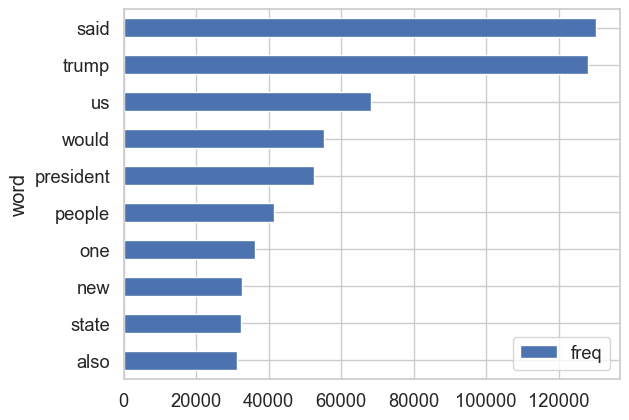

In [40]:
## plotting word frequency for top 10 words

textProcessorObject.plotWordFrequency(df.tokens)

In [48]:
#Word count per chap
df['WordCount'] = df['stemmer'].str.len()
df=df.reset_index(drop=True)
# df=df.drop(columns=['index'])
df=df.rename(columns={'category':'label'})
df

text  label  \
0      WASHINGTON (Reuters) head conservative Republi...      1   
1      WASHINGTON (Reuters) Transgender people allowe...      1   
2      WASHINGTON (Reuters) special counsel investiga...      1   
3      WASHINGTON (Reuters) Trump campaign adviser Ge...      1   
4      SEATTLE/WASHINGTON (Reuters) President Donald ...      1   
...                                                  ...    ...   
44893  21st Century Wire says 21WIRE reported earlier...      0   
44894  21st Century Wire says familiar theme. Wheneve...      0   
44895  Patrick Henningsen 21st Century WireRemember O...      0   
44896  21st Century Wire says Al Jazeera America go h...      0   
44897  21st Century Wire says 21WIRE predicted new ye...      0   

                                          lowercase_text  \
0      washington (reuters) head conservative republi...   
1      washington (reuters) transgender people allowe...   
2      washington (reuters) special counsel investiga...   
3      washington (reuters) trump campaign adviser ge...   
4      seattle/washington (reuters) president donald ...   
...                                                  ...   
44893  21st century wire says 21wire reported earlier...   
44894  21st century wire says familiar theme. wheneve...   
44895  patrick henningsen 21st century wireremember o...   
44896  21st century wire says al jazeera america go h...   
44897  21st century wire says 21wire predicted new ye...   

                                      remove_punctuation  \
0      washington reuters head conservative republica...   
1      washington reuters transgender people allowed ...   
2      washington reuters special counsel investigati...   
3      washington reuters trump campaign adviser geor...   
4      seattlewashington reuters president donald tru...   
...                                                  ...   
44893  21st century wire says 21wire reported earlier...   
44894  21st century wire says familiar theme whenever...   
44895  patrick henningsen 21st century wireremember o...   
44896  21st century wire says al jazeera america go h...   
44897  21st century wire says 21wire predicted new ye...   

                                       stopwords_removal  \
0      washington reuters head conservative republica...   
1      washington reuters transgender people allowed ...   
2      washington reuters special counsel investigati...   
3      washington reuters trump campaign adviser geor...   
4      seattlewashington reuters president donald tru...   
...                                                  ...   
44893  21st century wire says 21wire reported earlier...   
44894  21st century wire says familiar theme whenever...   
44895  patrick henningsen 21st century wireremember o...   
44896  21st century wire says al jazeera america go h...   
44897  21st century wire says 21wire predicted new ye...   

                                                  tokens  \
0      [washington, reuters, head, conservative, repu...   
1      [washington, reuters, transgender, people, all...   
2      [washington, reuters, special, counsel, invest...   
3      [washington, reuters, trump, campaign, adviser...   
4      [seattlewashington, reuters, president, donald...   
...                                                  ...   
44893  [21st, century, wire, says, 21wire, reported, ...   
44894  [21st, century, wire, says, familiar, theme, w...   
44895  [patrick, henningsen, 21st, century, wireremem...   
44896  [21st, century, wire, says, al, jazeera, ameri...   
44897  [21st, century, wire, says, 21wire, predicted,...   

                                                 stemmer  WordCount  
0      [washington, reuter, head, conserv, republican...        462  
1      [washington, reuter, transgend, peopl, allow, ...        391  
2      [washington, reuter, special, counsel, investi...        272  
3      [washington, reuter, trump, campaign, advis, g...        238  
4      [seatt

## Histplot

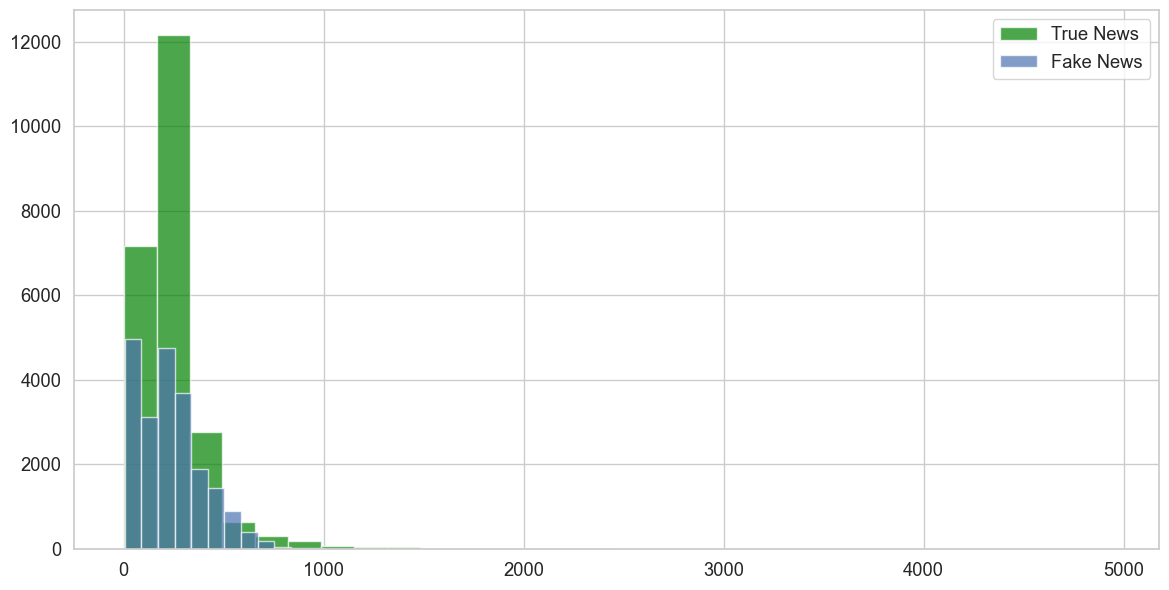

In [55]:
plt.figure(figsize=(14,7))
plt.hist(df[df['label']==0]['WordCount'], bins = 30, alpha = 0.7,color='green', label='True News')
plt.hist(df[df['label']==1]['WordCount'], bins = 30, alpha = 0.7, label='Fake News')
plt.legend()
plt.show()

#### We can see that 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category,random_state = 0)

In [ ]:
max_features = 10000
maxlen = 300

**Tokenizing Text -> Repsesenting each word by a number**

**Mapping of orginal word to number is preserved in word_index property of tokenizer**

**Tokenized applies basic processing like changing it to lower case, explicitely setting that as False**

**Lets keep all news to 300, add padding to news with less than 300 words and truncating long ones**

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

AttributeError: module 'keras.preprocessing.sequence' has no attribute 'pad_sequences'

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

# Introduction to GloVe
**GloVe method is built on an important idea,
You can derive semantic relationships between words from the co-occurrence matrix.
Given a corpus having V words, the co-occurrence matrix X will be a V x V matrix, where the i th row and j th column of X, X_ij denotes how many times word i has co-occurred with word j. An example co-occurrence matrix might look as follows.**
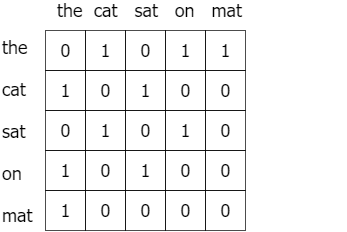

**The co-occurrence matrix for the sentence “the cat sat on the mat” with a window size of 1. As you probably noticed it is a symmetric matrix.
How do we get a metric that measures semantic similarity between words from this? For that, you will need three words at a time. Let me concretely lay down this statement.**

**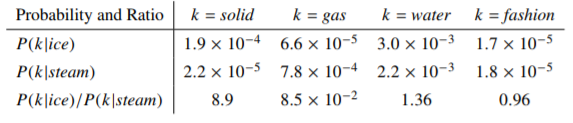
The behavior of P_ik/P_jk for various words
Consider the entity
P_ik/P_jk where P_ik = X_ik/X_i
Here P_ik denotes the probability of seeing word i and k together, which is computed by dividing the number of times i and k appeared together (X_ik) by the total number of times word i appeared in the corpus (X_i).
You can see that given two words, i.e. ice and steam, if the third word k (also called the “probe word”),
is very similar to ice but irrelevant to steam (e.g. k=solid), P_ik/P_jk will be very high (>1),
is very similar to steam but irrelevant to ice (e.g. k=gas), P_ik/P_jk will be very small (<1),
is related or unrelated to either words, then P_ik/P_jk will be close to 1
So, if we can find a way to incorporate P_ik/P_jk to computing word vectors we will be achieving the goal of using global statistics when learning word vectors.**

**Source Credits - https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010**

In [ ]:
EMBEDDING_FILE = '../input/glove-twitter/glove.twitter.27B.100d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3254: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


**Some Model Parameters**

In [ ]:
batch_size = 256
epochs = 10
embed_size = 100

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

# TRAINING THE MODEL

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 128)          117248    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Train on 33673 samples, validate on 11225 samples
Epoch 1/10
33673/33673 [==============================] - 85s 3ms/step - loss: 0.1537 - accuracy: 0.9349 - val_loss: 0.0723 - val_accuracy: 0.9768
Epoch 2/10
33673/33673 [==============================] - 82s 2ms/step - loss: 0.0384 - accuracy: 0.9872 - val_loss: 0.0155 - val_accuracy: 0.9946
Epoch 3/10
33673/33673 [==============================] - 82s 2ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0070 - val_accuracy: 0.9979
Epoch 4/10
33673/33673 [==============================] - 82s 2ms/step - loss: 0.0107 - accuracy: 0.9959 - val_loss: 0.0081 - val_accuracy: 0.9982
Epoch 5/10
33673/33673 [==============================] - 82s 2ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0068 - val_accuracy: 0.9979
Epoch 6/10
33673/33673 [==============================] - 82s 2ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.0078 - val_accuracy: 0.9982

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00499999

# ANALYSIS AFTER TRAINING OF MODEL

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

33673/33673 [==============================] - 108s 3ms/step
Accuracy of the model on Training Data is -  99.99703168869019 %
11225/11225 [==============================] - 36s 3ms/step
Accuracy of the model on Testing Data is -  99.86637234687805 %


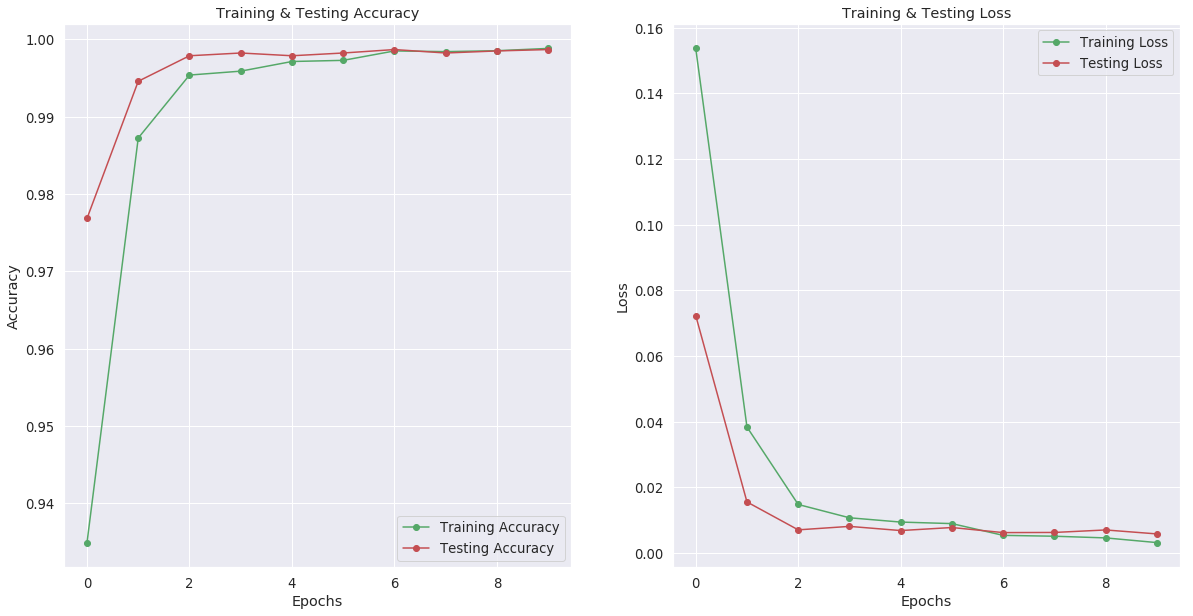

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = model.predict_classes(X_test)
pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5858
    Not Fake       1.00      1.00      1.00      5367

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[5850,    8],
       [   7, 5360]])

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(62.5, 0.5, 'Actual')

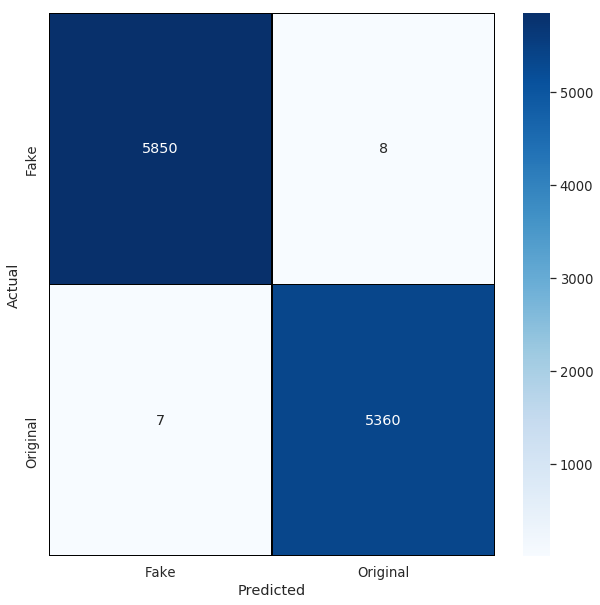

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")